# Perceptron

**Descrição**  
Este notebook apresenta a implementação didática de um *Perceptron* simples, composto por apenas um neurônio linear. O modelo é utilizado para aprender relações lineares entre uma variável de entrada e uma variável de saída, servindo como uma introdução prática aos conceitos fundamentais de redes neurais artificiais e aprendizado supervisionado.

**Objetivo**  
Demonstrar, de forma clara e intuitiva, como um neurônio artificial pode aprender a aproximar uma função do tipo \( y = ax + b \) a partir de dados ruidosos, utilizando gradiente descendente e retropropagação do erro. O foco é compreender o papel dos pesos, do erro e do processo iterativo de treinamento.

**Funcionamento**

![Perceptron](../../imagens/cap02/05_perceptron.png)

O perceptron recebe valores de entrada \(x\), calcula a saída por meio de uma combinação linear com pesos ajustáveis (\(w_1\) e \(w_2\)) e compara o valor predito com o valor real. A diferença entre esses valores é medida pelo erro quadrático médio (MSE), que é então usado para atualizar os pesos via *backpropagation*. Ao longo das iterações, o modelo converge para valores de pesos que minimizam o erro, resultando em uma boa aproximação linear dos dados.

**Matricialmente**

![Perceptron](../../imagens/cap02/05_peceptron_matricial.png)



In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Função geradora

In [2]:
def gerar_dados(
    a: float = 2.0, b: float = 1.0, n: int = 100, ruido_std: float = 0.5, seed: int = 42
) -> tuple[np.ndarray, np.ndarray]:
    """
    Gera dados no formato y = ax + b + ruído branco.

    Retorno:
    -------
    x : np.ndarray
        Valores de entrada.
    y : np.ndarray
        Valores de saída com ruído.
    """
    np.random.seed(seed)
    x = np.linspace(-5, 5, n)
    ruido = np.random.normal(0, ruido_std, size=n)
    y = a * x + b + ruido
    return x, y

## Gráfico dos dados gerados

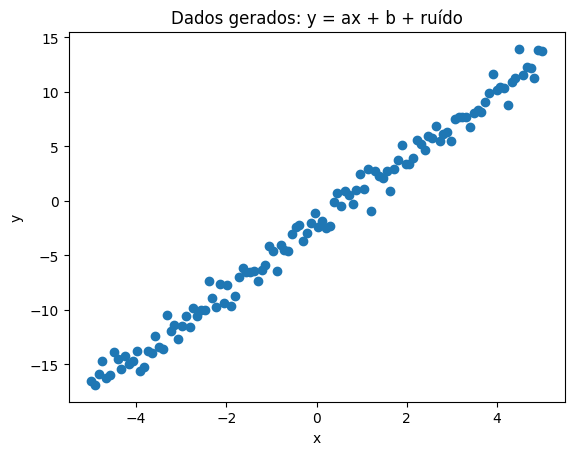

In [3]:
x, y = gerar_dados(a=3.0, b=-2.0, n=120, ruido_std=1.0)

plt.figure()
plt.scatter(x, y)
plt.title("Dados gerados: y = ax + b + ruído")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Implementação do perceptron (Neurônio linear)

### Como funcionam as derivadas?

https://editor.codecogs.com/home

Considere um neurônio linear definido por:

<img src="https://latex.codecogs.com/svg.image?\hat{y}_i = w_1 x_i + w_2"/>

O erro quadrático médio para um conjunto de $N$ amostras é definido como:

<img src="https://latex.codecogs.com/svg.image?\mathcal{L}(w_1, w_2) = \text{EQM} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2"/>

Substituindo $\hat{y}_i = w_1 x_i + w_2$:

<img src="https://latex.codecogs.com/svg.image?\mathcal{L}(w_1, w_2) = \frac{1}{N} \sum_{i=1}^{N} \left(y_i - (w_1 x_i + w_2)\right)^2"/>


**Derivada do EQM em relação a $w_1$**

Aplicando a regra da cadeia:

<img src="https://latex.codecogs.com/svg.image?\frac{\partial\mathcal{L}}{\partial&space;w_1}=\frac{1}{N}\sum_{i=1}^{N}\frac{\partial}{\partial&space;w_1}\left(y_i-(w_1&space;x_i&plus;w_2)\right)^2" title="\frac{\partial\mathcal{L}}{\partial w_1}=\frac{1}{N}\sum_{i=1}^{N}\frac{\partial}{\partial w_1}\left(y_i-(w_1 x_i+w_2)\right)^2" />


Derivando o termo quadrático:

<img src="https://latex.codecogs.com/svg.image?=\frac{1}{N}\sum_{i=1}^{N}2\left(y_i-\hat{y}_i\right)\frac{\partial}{\partial&space;w_1}\left(y_i-\hat{y}_i\right)" title="=\frac{1}{N}\sum_{i=1}^{N}2\left(y_i-\hat{y}_i\right)\frac{\partial}{\partial w_1}\left(y_i-\hat{y}_i\right)" />

Como:

<img src="https://latex.codecogs.com/svg.image?\frac{\partial}{\partial&space;w_1}(y_i-\hat{y}_i)=-x_i" title="\frac{\partial}{\partial w_1}(y_i-\hat{y}_i)=-x_i" />


temos:

<img src="https://latex.codecogs.com/svg.image?\frac{\partial\mathcal{L}}{\partial&space;w_1}=-\frac{2}{N}\sum_{i=1}^{N}x_i(y_i-\hat{y}_i)" title="\frac{\partial\mathcal{L}}{\partial w_1}=-\frac{2}{N}\sum_{i=1}^{N}x_i(y_i-\hat{y}_i)" />

Ou, em forma de média:

<img src="https://latex.codecogs.com/svg.image?\boxed{\frac{\partial\mathcal{L}}{\partial&space;w_1}=-2\,\mathbb{E}\left[x(y-\hat{y})\right]}" title="\boxed{\frac{\partial\mathcal{L}}{\partial w_1}=-2\,\mathbb{E}\left[x(y-\hat{y})\right]}" />


**Derivada do EQM em relação a $w_2$**

De forma análoga:

<img src="https://latex.codecogs.com/svg.image?\frac{\partial\mathcal{L}}{\partial&space;w_2}=\frac{1}{N}\sum_{i=1}^{N}2\left(y_i-\hat{y}_i\right)\frac{\partial}{\partial&space;w_2}\left(y_i-\hat{y}_i\right)" title="\frac{\partial\mathcal{L}}{\partial w_2}=\frac{1}{N}\sum_{i=1}^{N}2\left(y_i-\hat{y}_i\right)\frac{\partial}{\partial w_2}\left(y_i-\hat{y}_i\right)" />

Como:

<img src="https://latex.codecogs.com/svg.image?\frac{\partial}{\partial&space;w_2}(y_i-\hat{y}_i)=-1" title="\frac{\partial}{\partial w_2}(y_i-\hat{y}_i)=-1" />

Temos:

<img src="https://latex.codecogs.com/svg.image?\frac{\partial\mathcal{L}}{\partial&space;w_2}=-\frac{2}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)" title="\frac{\partial\mathcal{L}}{\partial w_2}=-\frac{2}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)" />

Ou, em sua forma média:

<img src="https://latex.codecogs.com/svg.image?\boxed{\frac{\partial\mathcal{L}}{\partial&space;w_2}=-2\,\mathbb{E}\left[y-\hat{y}\right]}" title="\boxed{\frac{\partial\mathcal{L}}{\partial w_2}=-2\,\mathbb{E}\left[y-\hat{y}\right]}" />

### Atualização dos pesos

As atualizações dos pesos são dadas por:

<img src="https://latex.codecogs.com/svg.image?w_1\leftarrow&space;w_1-\eta\frac{\partial\mathcal{L}}{\partial&space;w_1}" title="w_1\leftarrow w_1-\eta\frac{\partial\mathcal{L}}{\partial w_1}" />

<img src="https://latex.codecogs.com/svg.image?w_2\leftarrow&space;w_2-\eta\frac{\partial\mathcal{L}}{\partial&space;w_2}" title="w_2\leftarrow w_2-\eta\frac{\partial\mathcal{L}}{\partial w_2}" />

Substituindo as derivadas:

<img src="https://latex.codecogs.com/svg.image?w_1\leftarrow&space;w_1&plus;2\eta\,\mathbb{E}\left[x(y-\hat{y})\right]" title="w_1\leftarrow w_1+2\eta\,\mathbb{E}\left[x(y-\hat{y})\right]" />

<img src="https://latex.codecogs.com/svg.image?w_2\leftarrow&space;w_2&plus;2\eta\,\mathbb{E}\left[y-\hat{y}\right]" title="w_2\leftarrow w_2+2\eta\,\mathbb{E}\left[y-\hat{y}\right]" />

In [4]:
class NeuronioLinear:
    """
    Neurônio linear: y = w1 * x + w2
    """

    def __init__(self, lr: float = 0.01):
        """
        Inicializa o neurônio.

        Pesos inicializados aleatoriamente em [-1, 1].
        """
        self.w1 = np.random.uniform(-1, 1)
        self.w2 = np.random.uniform(-1, 1)
        self.lr = lr

        # Histórico
        self.historico_w1 = []
        self.historico_w2 = []
        self.historico_erro = []

    def forward(self, x: np.ndarray) -> np.ndarray:
        """Feedforward"""
        return self.w1 * x + self.w2

    @staticmethod
    def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
        """Erro Quadrático Médio"""
        return np.mean((y - y_hat) ** 2)

    def backward(self, x: np.ndarray, y: np.ndarray, y_hat: np.ndarray) -> None:
        """Backpropagation"""
        dw1 = -2 * np.mean(x * (y - y_hat))
        dw2 = -2 * np.mean(y - y_hat)

        self.w1 -= self.lr * dw1
        self.w2 -= self.lr * dw2

    def treinar(self, x: np.ndarray, y: np.ndarray, epocas: int = 100) -> None:
        """Loop de treinamento"""
        for _ in range(epocas):
            y_hat = self.forward(x)
            erro = self.mse(y, y_hat)

            self.historico_w1.append(self.w1)
            self.historico_w2.append(self.w2)
            self.historico_erro.append(erro)

            self.backward(x, y, y_hat)

## Execução do neurônio

Pesos inciais
modelo.w1=-0.5247249120152007
modelo.w2=0.45643269722371915
Pesos após o treino
modelo.w1=np.float64(3.0245519602557076)
modelo.w2=np.float64(-2.0345730268235176)


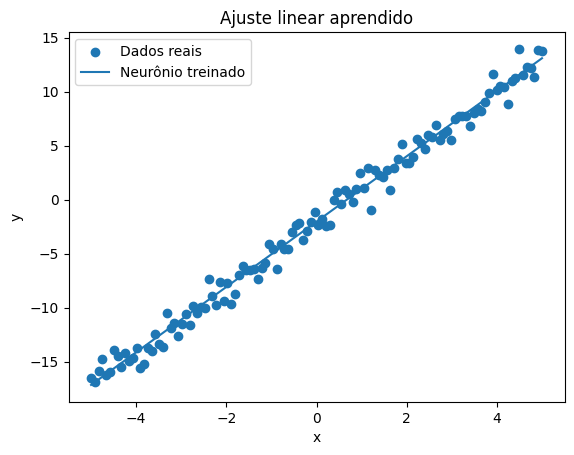

In [5]:
modelo = NeuronioLinear(lr=0.01)

print("Pesos inciais")
print(f"{modelo.w1=}")
print(f"{modelo.w2=}")

modelo.treinar(x, y, epocas=200)

print("=" * 20)
print("Pesos após o treino")
print(f"{modelo.w1=}")
print(f"{modelo.w2=}")


y_pred = modelo.forward(x)

plt.figure()
plt.scatter(x, y, label="Dados reais")
plt.plot(x, y_pred, label="Neurônio treinado")
plt.title("Ajuste linear aprendido")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Ajuste de w1

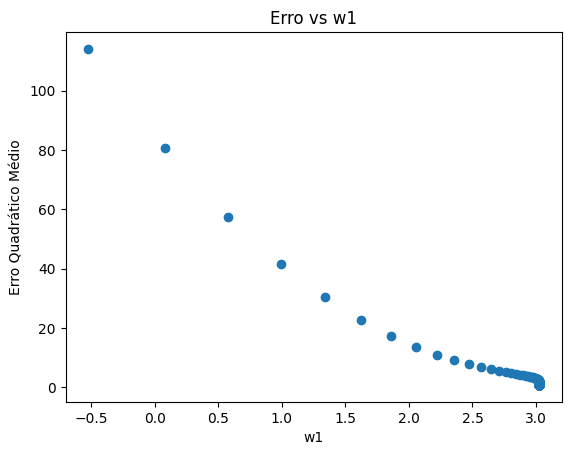

In [6]:
plt.figure()
plt.scatter(modelo.historico_w1, modelo.historico_erro)
plt.xlabel("w1")
plt.ylabel("Erro Quadrático Médio")
plt.title("Erro vs w1")
plt.show()

## Ajuste de w2

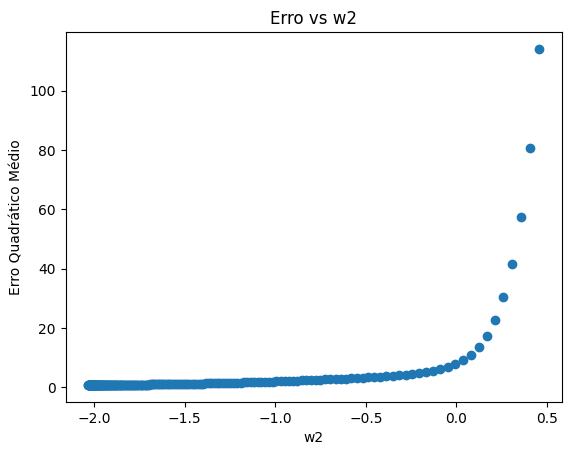

In [7]:
plt.figure()
plt.scatter(modelo.historico_w2, modelo.historico_erro)
plt.xlabel("w2")
plt.ylabel("Erro Quadrático Médio")
plt.title("Erro vs w2")
plt.show()

## Curvas de nível

In [8]:
def mse(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calcula o erro quadrático médio.
    """
    return np.mean((y_real - y_pred) ** 2)

In [9]:
w1_vals = np.linspace(-4, 4, 100)
w2_vals = np.linspace(-4, 4, 100)

W1, W2 = np.meshgrid(w1_vals, w2_vals)

Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        y_pred = W1[i, j] * x + W2[i, j]
        Z[i, j] = mse(y, y_pred)

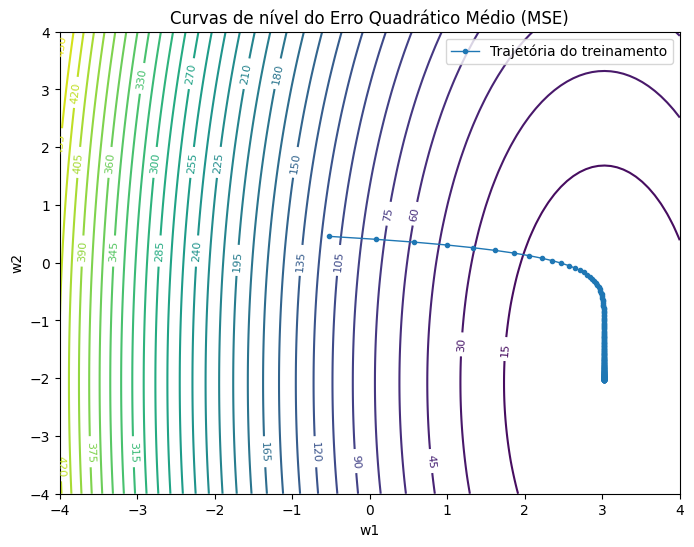

In [10]:
plt.figure(figsize=(8, 6))

contours = plt.contour(W1, W2, Z, levels=40)

plt.clabel(contours, inline=True, fontsize=8)

plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Curvas de nível do Erro Quadrático Médio (MSE)")

plt.plot(
    modelo.historico_w1,
    modelo.historico_w2,
    marker="o",
    markersize=3,
    linewidth=1,
    label="Trajetória do treinamento",
)

plt.legend()
plt.show()

## Limitações do neurônio linear

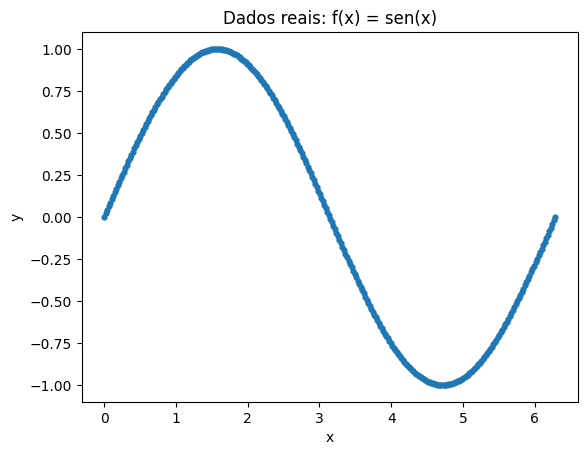

In [11]:
def gerar_dados_seno(
    n: int = 300,
    x_min: float = 0.0,
    x_max: float = 2 * np.pi,
    ruido_std: float = 0.0,
    seed: int = 42,
) -> tuple[np.ndarray, np.ndarray]:
    """
    Gera dados y = sen(x) em um intervalo definido.
    """
    np.random.seed(seed)
    x = np.linspace(x_min, x_max, n)
    y = np.sin(x)

    if ruido_std > 0:
        y = y + np.random.normal(0, ruido_std, size=n)

    return x, y


x, y = gerar_dados_seno(n=300, x_min=0, x_max=2 * np.pi, ruido_std=0.0)

plt.figure()
plt.scatter(x, y, s=12)
plt.title("Dados reais: f(x) = sen(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Pesos inciais
modelo.w1=-0.250919762305275
modelo.w2=0.9014286128198323
Pesos após o treino
modelo.w1=np.float64(-0.2959652657388076)
modelo.w2=np.float64(0.9249474334876112)


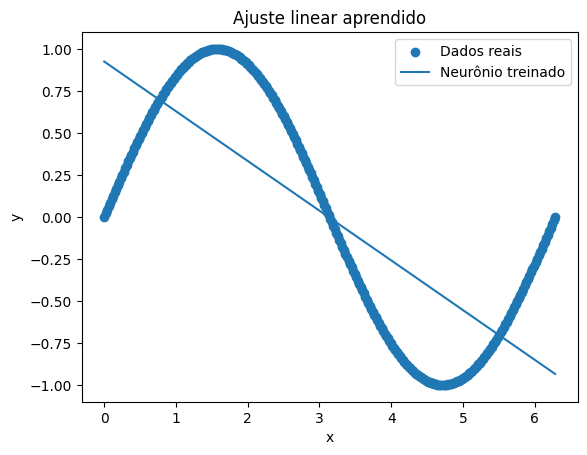

In [12]:
modelo = NeuronioLinear(lr=0.01)

print("Pesos inciais")
print(f"{modelo.w1=}")
print(f"{modelo.w2=}")

modelo.treinar(x, y, epocas=200)

print("=" * 20)
print("Pesos após o treino")
print(f"{modelo.w1=}")
print(f"{modelo.w2=}")


y_pred = modelo.forward(x)

plt.figure()
plt.scatter(x, y, label="Dados reais")
plt.plot(x, y_pred, label="Neurônio treinado")
plt.title("Ajuste linear aprendido")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

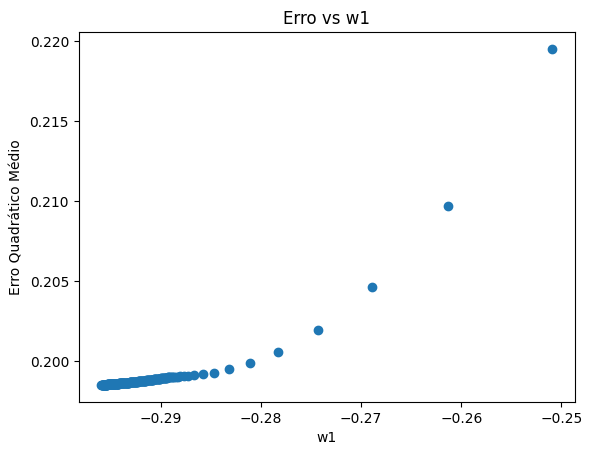

In [13]:
plt.figure()
plt.scatter(modelo.historico_w1, modelo.historico_erro)
plt.xlabel("w1")
plt.ylabel("Erro Quadrático Médio")
plt.title("Erro vs w1")
plt.show()

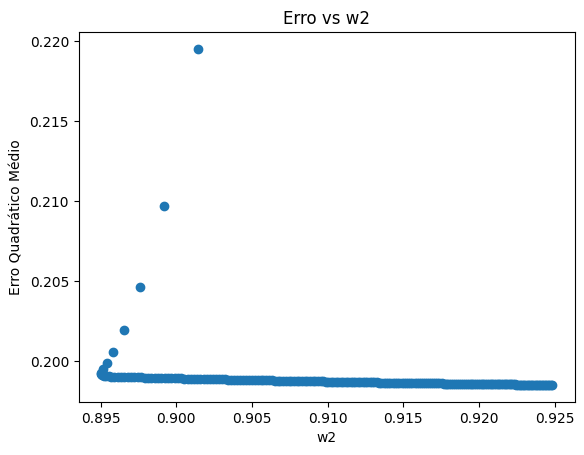

In [14]:
plt.figure()
plt.scatter(modelo.historico_w2, modelo.historico_erro)
plt.xlabel("w2")
plt.ylabel("Erro Quadrático Médio")
plt.title("Erro vs w2")
plt.show()